In [2]:
import pandas as pd
import numpy as np

In [3]:
heir_raw = pd.read_parquet('./heir_raw.parquet')
df_y_actual = pd.read_parquet('./actual.parquet')

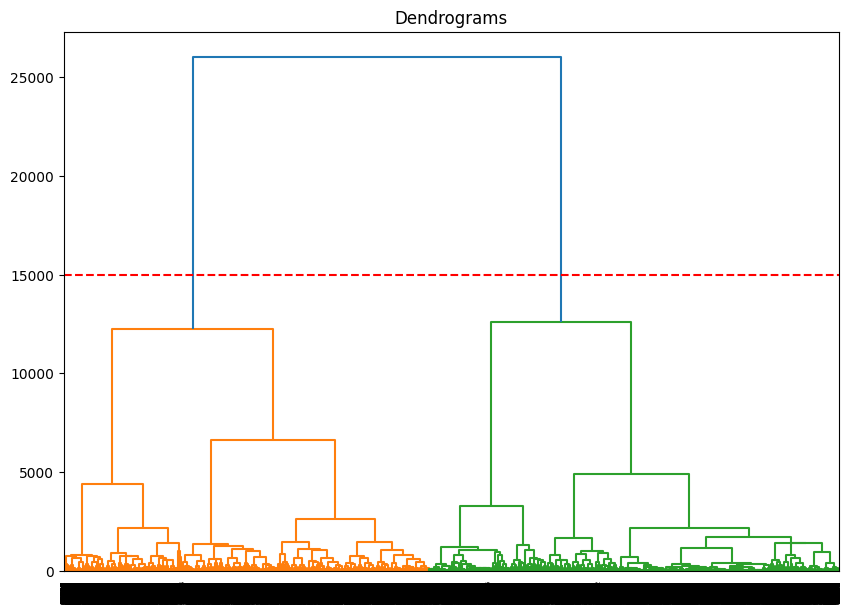

In [4]:
# Dendogram for Heirarchical Clustering
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot

pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(heir_raw, method='ward'))
pyplot.axhline(y=15000, color='r', linestyle='--')

In [3]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward') 
predicted_values = cluster.fit_predict(heir_raw)

C:\Users\Dulshan\PycharmProjects\jupyter\.venv\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [9]:
df_pred = pd.DataFrame(predicted_values, columns=['pred'])

In [10]:
final_df = pd.concat([df_pred, df_y_actual], axis=1, join="inner")

In [11]:
final_df

,pred,actual
0,0,0
1,1,0
2,0,0
3,0,1
4,1,1
...,...,...
67186,1,1
67187,0,0
67188,1,0
67189,0,1


In [12]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [13]:
predicted = final_df['pred']
actual = final_df['actual']

In [14]:
# Calculating accuracy
accuracy = accuracy_score(actual, predicted)

# Calculating precision
precision = precision_score(actual, predicted, average='weighted')

# Calculating recall
recall = recall_score(actual, predicted, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.5076275096367073
Precision: 0.5076123115629723
Recall: 0.5076275096367073


In [20]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(heir_raw, predicted)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.4939046507670186


In [18]:
heir_raw.reset_index(inplace=False)

,case_id,MONTH,WEEK_NUM,cntincpaycont9m_3716944L,cntpmts24_3658933L,commnoinclast6m_3546845L,eir_270L,interestrate_311L,lastapprcredamount_781A,lastrejectcredamount_222A,...,disbursementtype_67L,isbidproduct_1095L,lastapprcommoditycat_1041M,lastapprcommoditytypec_5251766M,lastcancelreason_561M,lastrejectcommoditycat_161M,lastrejectcommodtypec_5251769M,lastrejectreason_759M,lastrejectreasonclient_4145040M,previouscontdistrict_112M
0,105588.0,201901.0,2.0,0.138437,-0.123999,0.0,0.934709,0.894569,2.095303,-0.616854,...,1.0,0.0,33.0,85.0,57.0,35.0,84.0,17.0,10.0,136.0
1,2608648.0,201908.0,32.0,-0.731513,-0.885906,0.0,0.771123,0.728891,0.115756,0.600801,...,1.0,1.0,33.0,85.0,57.0,35.0,84.0,17.0,10.0,8.0
2,2583138.0,201906.0,23.0,0.660408,2.288709,0.0,0.771123,0.728891,2.095303,-0.089203,...,1.0,1.0,33.0,85.0,18.0,35.0,84.0,17.0,10.0,171.0
3,1358817.0,201905.0,17.0,-0.731513,-0.758922,0.0,0.825652,0.784117,-0.370647,-0.464485,...,2.0,0.0,6.0,85.0,57.0,29.0,84.0,15.0,9.0,168.0
4,1314891.0,201903.0,11.0,0.834398,0.256955,0.0,0.607537,0.563213,-0.376868,-0.616854,...,2.0,0.0,6.0,85.0,57.0,35.0,84.0,17.0,10.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67186,214133.0,202003.0,61.0,1.182378,0.256955,0.0,0.934709,0.894569,1.360043,0.194916,...,1.0,0.0,33.0,85.0,52.0,35.0,84.0,7.0,9.0,25.0
67187,749026.0,201907.0,28.0,-0.731513,-0.885906,0.0,0.607537,0.563213,-0.732621,-0.616854,...,2.0,0.0,33.0,85.0,57.0,35.0,84.0,17.0,10.0,221.0
67188,1770557.0,202002.0,56.0,1.182378,0.129970,0.0,0.607537,0.563213,-0.280153,-0.616854,...,2.0,0.0,33.0,85.0,57.0,35.0,84.0,17.0,10.0,35.0
67189,30218.0,201909.0,36.0,-0.731513,-0.885906,0.0,-0.428507,-0.060213,-0.732621,0.194916,...,0.0,0.0,33.0,85.0,52.0,35.0,84.0,7.0,9.0,221.0


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(heir_raw)
numped_arry = predicted.to_numpy()

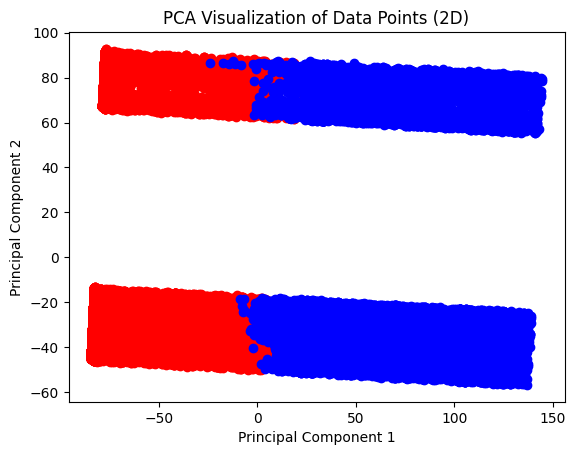

In [23]:
plt.scatter(reduced_data[numped_arry == 0, 0], reduced_data[numped_arry == 0, 1], color='red', label='Class 0')
plt.scatter(reduced_data[numped_arry == 1, 0], reduced_data[numped_arry == 1, 1], color='blue', label='Class 1')
plt.title('PCA Visualization of Data Points (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [24]:
from sklearn.metrics import rand_score, adjusted_rand_score

RI = rand_score(actual, predicted)
ARI = adjusted_rand_score(actual, predicted)

In [25]:
RI

0.5001089179547198